## Dynamic Field Theory Simulation

- A 1D neural field with neurons responding to different feature values.
- Local excitation & global inhibition create stable activity 'bumps'/locations (attractors).
- The activity evolves over time, showing how the brain might maintain stable representations in working memory.

## Simulation steps
- Initialize a 1D field of neurons (each tuned to different feature values).
- Apply an initial input (stimulus to a subset of neurons).
- Update activity over time using a differential equation with excitatory and inhibitory connections.


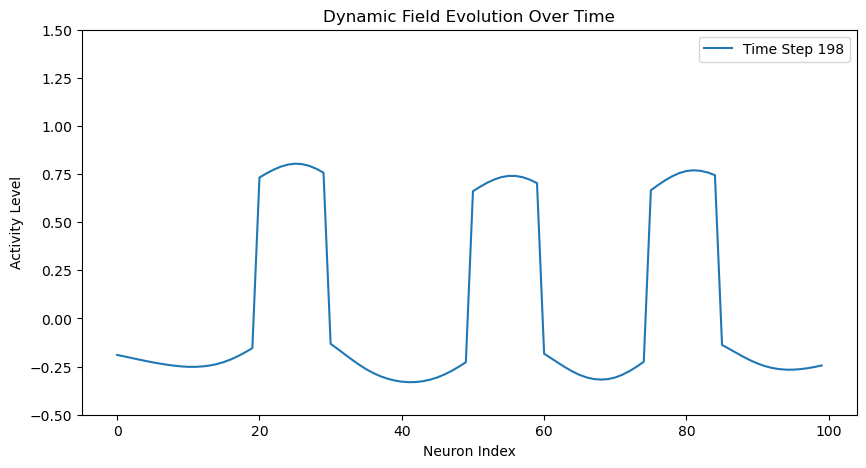

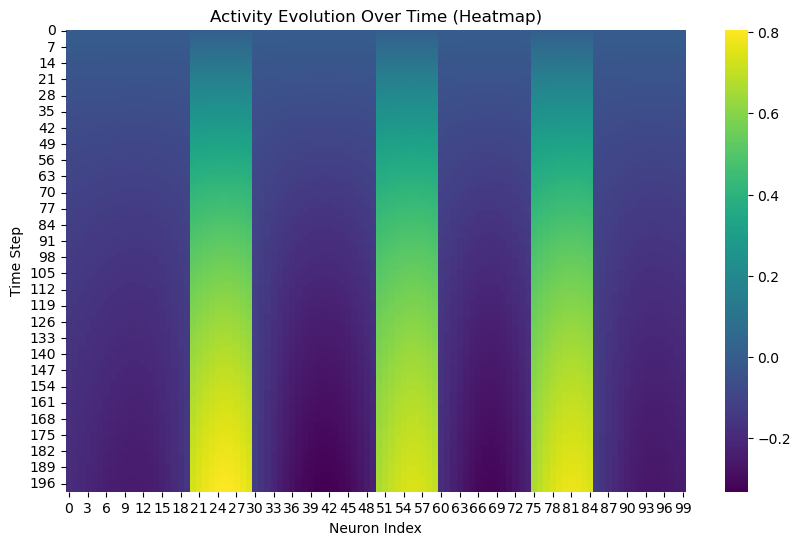

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from IPython.display import display, clear_output
import time

# ==============================
# Step 1: Define Parameters
# ==============================
num_neurons = 100  # Number of neurons in the field
time_steps = 200  # Number of simulation steps
dt = 0.1  # Time step increment

# Neural field parameters
tau = 10  # Time constant
excitation_width = 5  # Local excitation width
inhibition_width = 20  # Global inhibition width
excitation_strength = 0.6
inhibition_strength = 0.4
resting_activity = -0.2  # Baseline inhibition

# ==============================
# Step 2: Initialize Neural Field
# ==============================
activity = np.zeros(num_neurons)  # Initial activity (all neurons at rest)
input_stimulus = np.zeros(num_neurons)
# input_stimulus[20:30] = 1  # First peak at neurons 20-30
input_stimulus[50:60] = 1  # Provide an initial stimulus to neurons 40-60
# input_stimulus[75:85] = 1  # Third peak at neurons 75-85

# ==============================
# Step 3: Define Interaction Kernel (Mexican-Hat Function)
# ==============================
def mexican_hat_kernel(size, exc_width, inh_width, exc_strength, inh_strength):
    x = np.arange(-size//2, size//2)
    excitation = np.exp(-x**2 / (2 * exc_width**2)) * exc_strength
    inhibition = np.exp(-x**2 / (2 * inh_width**2)) * inh_strength
    kernel = excitation - inhibition
    return kernel / np.sum(np.abs(kernel))  # Normalize

interaction_kernel = mexican_hat_kernel(num_neurons, excitation_width, inhibition_width,
                                       excitation_strength, inhibition_strength)

# ==============================
# Step 4: Run Simulation
# ==============================
activity_over_time = []

for t in range(time_steps):
    # Compute interaction effect (convolution of activity with kernel)
    interaction_effect = np.convolve(activity, interaction_kernel, mode='same')

    # Update activity using neural field equation
    d_activity = (-activity + interaction_effect + input_stimulus + resting_activity) / tau
    activity += d_activity * dt

    # Store activity for visualization
    activity_over_time.append(activity.copy())

    # Visualization
    pstep = 2
    if t % pstep == 0:  # Update plot every pstep time steps
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(activity, label=f"Time Step {t}")
        plt.ylim(-0.5, 1.5)
        plt.xlabel("Neuron Index")
        plt.ylabel("Activity Level")
        plt.title("Dynamic Field Evolution Over Time")
        plt.legend()
        plt.show()
        time.sleep(0.1)

# ==============================
# Step 5: Final Heatmap Visualization
# ==============================
plt.figure(figsize=(10, 6))
sns.heatmap(np.array(activity_over_time), cmap="viridis", cbar=True)
plt.xlabel("Neuron Index")
plt.ylabel("Time Step")
plt.title("Activity Evolution Over Time (Heatmap)")
plt.show()


## How This Demonstration Works

### Excitation and Inhibition:

- Neurons excite local neighbors (Gaussian spread).
- Neurons inhibit distant neurons (wider suppression zone).
- This forms self-sustaining attractors.

### Attractor States:

Once the initial stimulus is removed, the activity bump remains stable.
The network remembers past activation (like in working memory).

### Python Visualization:

Line plot updates in real-time → Shows how activity spreads over time.
Heatmap at the end → Illustrates the temporal evolution of neural activity.

### What Can You Modify?
- Change the input stimulus (e.g., multiple peaks instead of one). Uncomment lines 28 and 30 to create more peaks.
- Change peak strengths -- give them different values, like 0.5, 0.8, 1.0
- Modify the excitation/inhibition widths to see how attractors form differently.
- Increase time steps to observe long-term stability.
- See how things change if you introduce a peak later, e.g.:
```
if t > 50:  # After 50 time steps, add another peak
    input_stimulus[10:20] = 1
```


### Neuroscience Relevance

- Working Memory: How the brain holds onto information over time.
- Decision-Making: Competing attractors represent different choices.
- Perceptual Stability: The brain maintains stable perceptions despite fluctuations.


# Lab question

In ~3 sentences, summarize the key features of DFT. 